In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

In [3]:

airports = pd.read_csv("/Users/jonathanlifferth/data/flight_paths/airports.dat.txt", delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

airports

,id,name,city,country,iata,icao,lat,long,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


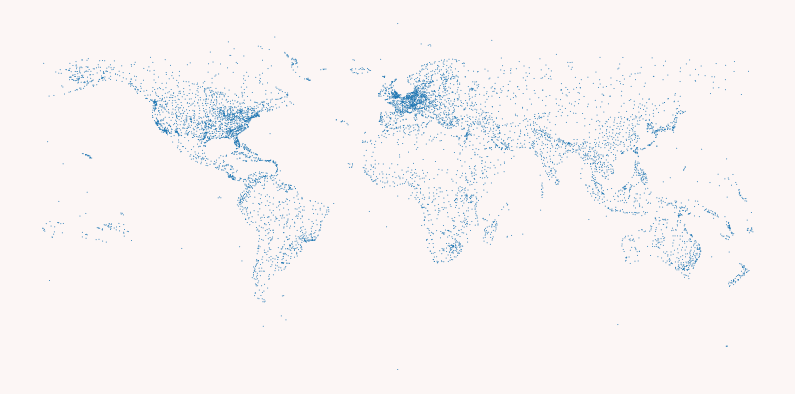

<Figure size 6000x4000 with 0 Axes>

In [4]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)

ax.scatter(airports['long'], airports['lat'], s=1, alpha=1, edgecolors='none')
ax.axis('off')
# plt.savefig('scatterplot.png', dpi=500)
plt.figure(dpi=1000)
plt.show()


In [5]:
routes = pd.read_csv("/Users/jonathanlifferth/data/flight_paths/routes.dat.txt", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])
routes

,airline,id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equitment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [6]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

In [7]:
source_airports

,name_source,iata_source,icao_source,lat_source,long_source
0,Goroka Airport,GKA,AYGA,-6.081690,145.391998
1,Madang Airport,MAG,AYMD,-5.207080,145.789001
2,Mount Hagen Kagamuga Airport,HGU,AYMH,-5.826790,144.296005
3,Nadzab Airport,LAE,AYNZ,-6.569803,146.725977
4,Port Moresby Jacksons International Airport,POM,AYPY,-9.443380,147.220001
...,...,...,...,...,...
7693,Rogachyovo Air Base,\N,ULDA,71.616699,52.478298
7694,Ulan-Ude East Airport,\N,XIUW,51.849998,107.737999
7695,Krechevitsy Air Base,\N,ULLK,58.625000,31.385000
7696,Desierto de Atacama Airport,CPO,SCAT,-27.261200,-70.779198


In [8]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

print(routes.columns)

Index(['source_airport', 'destination_airport', 'name_source', 'iata_source',
       'icao_source', 'lat_source', 'long_source', 'name_destination',
       'iata_destination', 'icao_destination', 'lat_destination',
       'long_destination'],
      dtype='object')


In [9]:
geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes = gpd.GeoDataFrame(routes, geometry=geometry, crs='EPSG:4326')
print(routes)

      source_airport destination_airport                       name_source  \
0                AER                 KZN       Sochi International Airport   
1                ASF                 KZN                 Astrakhan Airport   
2                CEK                 KZN     Chelyabinsk Balandino Airport   
3                DME                 KZN  Domodedovo International Airport   
4                DME                 KZN  Domodedovo International Airport   
...              ...                 ...                               ...   
66929            ZKE                 YFA               Kashechewan Airport   
66930            YPO                 YAT                 Peawanuck Airport   
66931            ZKE                 YAT               Kashechewan Airport   
66932            JCK                 RCM               Julia Creek Airport   
66933            TRO                 GFN                     Taree Airport   

      iata_source icao_source  lat_source  long_source  \
0    

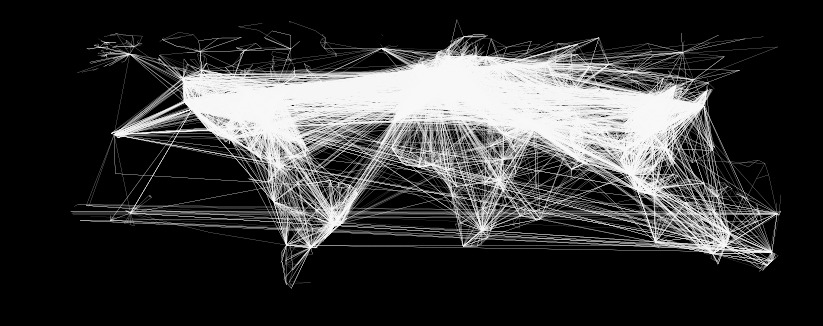

In [10]:
fig = plt.figure(facecolor='black')
ax = plt.axes()

fig.set_size_inches(14, 7)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

# plt.savefig('linestring.png', dpi=500)
plt.show()

In [11]:
import cartopy.crs as ccrs


In [ ]:
fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)

plt.show()